Downloaded and slightly modified from [the scipy lecture series web site](http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html)

In [1]:
%matplotlib inline


# Image denoising by FFT


Denoise an image (`images/moonlanding.png`) by
implementing a blur with an FFT.

Implements, via FFT, the following convolution:

\begin{align}f_1(t) = \int dt'\, K(t-t') f_0(t')\end{align}

\begin{align}\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)\end{align}




## Read and plot the image

Text(0.5, 1.0, 'Original image')

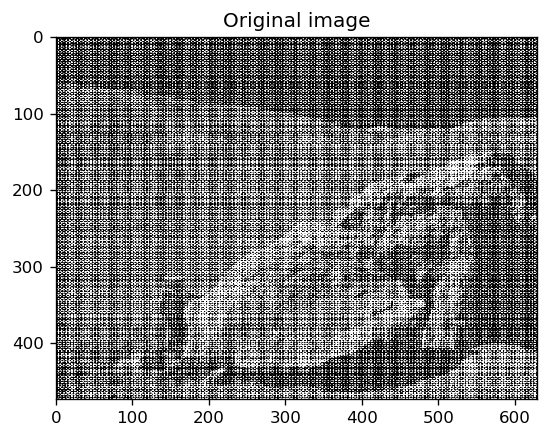

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Changing the default dpi to make the figures bigger
plt.rcParams['figure.dpi'] = 120

im = plt.imread('images/moonlanding.jpg').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

## Compute the 2d FFT of the input image

Text(0.5, 1.0, 'Fourier transform')

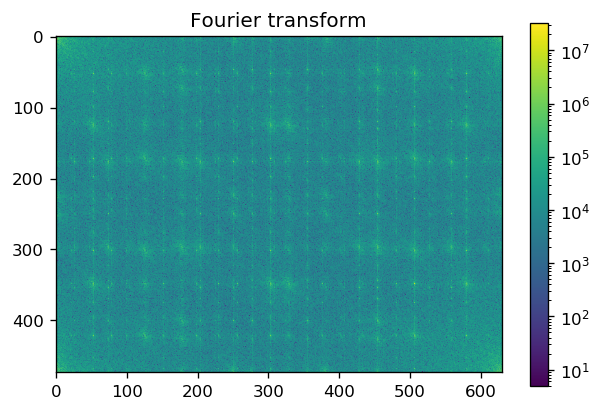

In [3]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

## Filter in FFT

Text(0.5, 1.0, 'Filtered Spectrum')

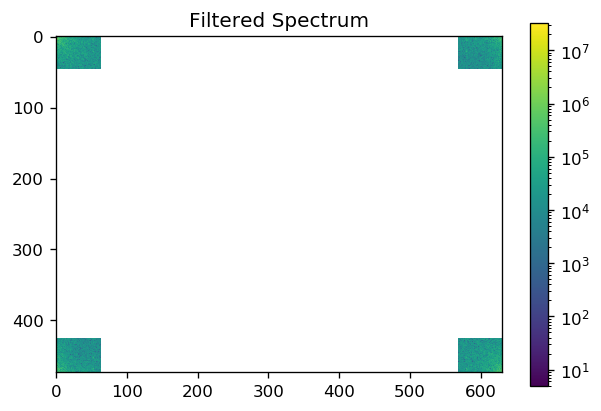

In [4]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

## Reconstruct the final image

Text(0.5, 1.0, 'Reconstructed Image')

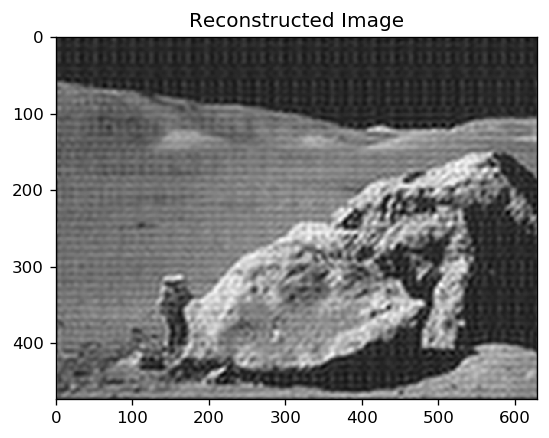

In [5]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

## Easier and better: `scipy.ndimage.gaussian_filter`

 Implementing filtering directly with FFTs is tricky and time consuming.
 We can use the Gaussian filter from `scipy.ndimage`

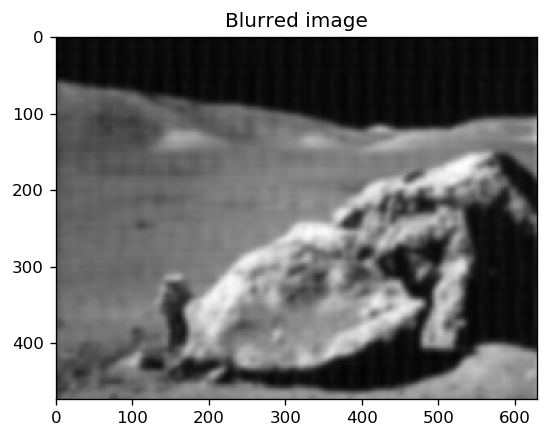

In [6]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()